In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### UC data

In [2]:
metadata = pd.read_csv('all_runs_metadata.tsv', sep= '\t')

In [3]:
uid_map = pd.read_csv('samples_loaded.txt', delimiter = '\t')

In [4]:
merged_metadata = pd.merge(uid_map, metadata, left_on='accession_id', right_on='run_id', how='inner')

In [5]:
UC_projects = ['PRJNA50637', 'PRJEB1220', 'PRJNA398089', 'PRJNA389280', 'PRJNA400072', 'PRJNA388210', 'PRJNA285502', 'PRJNA450340', 'PRJNA368966', 'PRJNA438164', 'PRJNA240346', 'PRJDB4871', 'PRJNA318788', 'PRJNA232056', 'PRJNA298762', 'PRJNA233411', 'PRJNA284397', 'PRJNA324147' ] 

In [6]:
UC_metadata = merged_metadata[merged_metadata['project_id'].isin(UC_projects)]

In [7]:
UC_metadata = UC_metadata[UC_metadata['disease'].isin(['D003093', 'D006262'])]

In [8]:
UC_metadata.shape

(3257, 21)

In [9]:
UC_metadata['experiment_type'].value_counts()

experiment_type
Amplicon        2046
Metagenomics    1159
metagenomics      52
Name: count, dtype: int64

In [10]:
UC_metadata_amplicon = UC_metadata[UC_metadata['experiment_type'].isin(['Amplicon', 'AMPLICON'])]

In [11]:
UC_metadata_metagenomics = UC_metadata[UC_metadata['experiment_type'].isin(['metagenomics', 'Metagenomics'])]

In [12]:
relative_abundance = pd.read_csv('relative_abundance.csv')

In [13]:
relative_abundance

,loaded_uid,6,7,9,10,11,13,14,16,17,...,2211641,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2529408
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32239,52855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32240,52856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32241,52857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32242,52858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_amplicon = set(relative_abundance['loaded_uid']).intersection(set(UC_metadata_amplicon['uid']))

print(len(common_uids_amplicon))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
UC_relative_abundance_amplicon = relative_abundance[relative_abundance['loaded_uid'].isin(common_uids_amplicon)]
UC_metadata_amplicon = UC_metadata_amplicon[UC_metadata_amplicon['uid'].isin(common_uids_amplicon)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids_amplicon)

# # Reindex both DataFrames to ensure they follow the same order
UC_relative_abundance_amplicon = UC_relative_abundance_amplicon.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
UC_metadata_amplicon = UC_metadata_amplicon.set_index('uid').loc[common_uids_sorted].reset_index()

810


In [15]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_metagenomics = set(relative_abundance['loaded_uid']).intersection(set(UC_metadata_metagenomics['uid']))

print(len(common_uids_metagenomics))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
UC_relative_abundance_metagenomics = relative_abundance[relative_abundance['loaded_uid'].isin(common_uids_metagenomics)]
UC_metadata_metagenomics = UC_metadata_metagenomics[UC_metadata_metagenomics['uid'].isin(common_uids_metagenomics)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids_metagenomics)

# # Reindex both DataFrames to ensure they follow the same order
UC_relative_abundance_metagenomics = UC_relative_abundance_metagenomics.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
UC_metadata_metagenomics = UC_metadata_metagenomics.set_index('uid').loc[common_uids_sorted].reset_index()

998


In [16]:
UC_metadata_amplicon.shape

(810, 21)

In [17]:
UC_metadata_amplicon['disease'].value_counts()

disease
D003093    724
D006262     86
Name: count, dtype: int64

In [18]:
UC_metadata_metagenomics['disease'].value_counts()

disease
D006262    540
D003093    525
Name: count, dtype: int64

In [19]:
UC_metadata_metagenomics['project_id'].value_counts()

project_id
PRJEB1220      700
PRJNA389280    215
PRJNA50637      90
PRJNA285502     52
PRJNA438164      8
Name: count, dtype: int64

remove relative abundance columns that all are 0

check for correct BMI and age

split to train and test

In [20]:
UC_relative_abundance_metagenomics.shape

(998, 8600)

In [21]:
UC_metadata_metagenomics.shape

(1065, 21)

In [22]:
UC_relative_abundance_metagenomics = UC_relative_abundance_metagenomics.loc[:, (UC_relative_abundance_metagenomics != 0).any(axis=0)]

In [23]:
UC_relative_abundance_metagenomics.shape

(998, 700)

In [24]:
UC_metadata_metagenomics = UC_metadata_metagenomics[UC_metadata_metagenomics['accession_id'].map(UC_metadata_metagenomics['accession_id'].value_counts()) == 1]

In [25]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_metagenomics = set(UC_relative_abundance_metagenomics['loaded_uid']).intersection(set(UC_metadata_metagenomics['uid']))

print(len(common_uids_metagenomics))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
UC_relative_abundance_metagenomics = UC_relative_abundance_metagenomics[UC_relative_abundance_metagenomics['loaded_uid'].isin(common_uids_metagenomics)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids_metagenomics)

# # Reindex both DataFrames to ensure they follow the same order
UC_relative_abundance_metagenomics = UC_relative_abundance_metagenomics.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
UC_metadata_metagenomics = UC_metadata_metagenomics.set_index('uid').loc[common_uids_sorted].reset_index()

931


In [26]:
UC_relative_abundance_metagenomics.shape

(931, 700)

In [27]:
UC_metadata_metagenomics.shape

(931, 21)

In [28]:
UC_metadata_metagenomics['project_id'].value_counts()

project_id
PRJEB1220      700
PRJNA50637      90
PRJNA389280     81
PRJNA285502     52
PRJNA438164      8
Name: count, dtype: int64

In [29]:
UC_metadata_metagenomics.to_csv('UC_metadata_metagenomics.csv', index = False)

In [30]:
UC_relative_abundance_metagenomics.to_csv('UC_relative_abundance_metagenomics.csv', index = False)

### train/test

In [1]:
UC_metadata_metagenomics = pd.read_csv('UC_metadata_metagenomics.csv')
UC_relative_abundance_metagenomics = pd.read_csv('UC_relative_abundance_metagenomics.csv')

NameError: name 'pd' is not defined

In [3]:
UC_metadata_metagenomics_train = UC_metadata_metagenomics[UC_metadata_metagenomics['project_id']=='PRJEB1220']

In [4]:
UC_metadata_metagenomics_train = UC_metadata_metagenomics_train[UC_metadata_metagenomics_train['host_age']>=1]

In [5]:
UC_metadata_metagenomics_train.shape

(699, 21)

In [6]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_metagenomics_train = set(UC_relative_abundance_metagenomics['loaded_uid']).intersection(set(UC_metadata_metagenomics_train['uid']))

print(len(common_uids_metagenomics_train))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
UC_relative_abundance_metagenomics_train = UC_relative_abundance_metagenomics[UC_relative_abundance_metagenomics['loaded_uid'].isin(common_uids_metagenomics_train)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids_metagenomics_train)

# # Reindex both DataFrames to ensure they follow the same order
UC_relative_abundance_metagenomics_train = UC_relative_abundance_metagenomics_train.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
UC_metadata_metagenomics_train = UC_metadata_metagenomics_train.set_index('uid').loc[common_uids_sorted].reset_index()

699


In [7]:
UC_relative_abundance_metagenomics_train.shape
UC_metadata_metagenomics_train.shape

(699, 21)

In [15]:
UC_metadata_metagenomics_train['sex'].value_counts()

sex
Female    396
Male      303
Name: count, dtype: int64

In [8]:
UC_relative_abundance_metagenomics_train.to_csv('UC_relative_abundance_metagenomics_train.csv', index=False)
UC_metadata_metagenomics_train.to_csv('UC_metadata_metagenomics_train.csv', index=False)

In [9]:
UC_metadata_metagenomics_test = UC_metadata_metagenomics[UC_metadata_metagenomics['project_id']!='PRJEB1220']

In [10]:
UC_metadata_metagenomics_test.shape

(231, 21)

In [11]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_metagenomics_test = set(UC_relative_abundance_metagenomics['loaded_uid']).intersection(set(UC_metadata_metagenomics_test['uid']))

print(len(common_uids_metagenomics_test))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
UC_relative_abundance_metagenomics_test = UC_relative_abundance_metagenomics[UC_relative_abundance_metagenomics['loaded_uid'].isin(common_uids_metagenomics_test)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids_metagenomics_test)

# # Reindex both DataFrames to ensure they follow the same order
UC_relative_abundance_metagenomics_test = UC_relative_abundance_metagenomics_test.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
UC_metadata_metagenomics_test = UC_metadata_metagenomics_test.set_index('uid').loc[common_uids_sorted].reset_index()

231


In [14]:
UC_relative_abundance_metagenomics_test.to_csv('UC_relative_abundance_metagenomics_test.csv', index=False)
UC_metadata_metagenomics_test.to_csv('UC_metadata_metagenomics_test.csv', index=False)

### EDA

In [3]:
train_UC = pd.read_csv('UC_metadata_metagenomics_train.csv')

In [4]:
test_UC = pd.read_csv('UC_metadata_metagenomics_test.csv')

In [5]:
train_UC['disease'].value_counts()

disease
D006262    475
D003093    224
Name: count, dtype: int64

In [6]:
test_UC['disease'].value_counts()

disease
D003093    167
D006262     64
Name: count, dtype: int64

In [7]:
train_UC['host_age'].count()

699

In [8]:
test_UC['host_age'].count()

80

In [9]:
train_UC['sex'].value_counts()

sex
Female    396
Male      303
Name: count, dtype: int64

In [10]:
test_UC['sex'].value_counts()

sex
Male      96
Female    75
Name: count, dtype: int64

In [11]:
train_UC['BMI'].count()

630

In [12]:
test_UC['BMI'].count()

0

### balanced test data

In [3]:
test_metadata = pd.read_csv('UC_metadata_metagenomics_test.csv')

In [4]:
test_metadata['disease'].value_counts()

disease
D003093    167
D006262     64
Name: count, dtype: int64

In [6]:
# Count occurrences of each value
count_D003093 = test_metadata[test_metadata['disease'] == 'D003093'].shape[0]
count_D006262 = test_metadata[test_metadata['disease'] == 'D006262'].shape[0]

# Determine the number of rows to remove
min_count = min(count_D003093, count_D006262)

# Sample rows to keep for both categories
df_D003093 = test_metadata[test_metadata['disease'] == 'D003093'].sample(min_count, random_state=42)
df_D006262 = test_metadata[test_metadata['disease'] == 'D006262'].sample(min_count, random_state=42)

# Concatenate the balanced dataset
test_metadata_balanced = pd.concat([df_D003093, df_D006262])

# Optional: Reset index if needed
test_metadata_balanced = test_metadata_balanced.reset_index(drop=True)

# test_metadata_balanced


In [7]:
test_relative_abundance = pd.read_csv("UC_relative_abundance_metagenomics_test.csv")

In [8]:
# Step 1: Find common UIDs between the two DataFrames
common_uids= set(test_metadata_balanced['uid'])

print(len(common_uids))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
test_relative_abundance_balanced = test_relative_abundance[test_relative_abundance['loaded_uid'].isin(common_uids)]

# # Step 3: Sort both DataFrames by the same order of UIDs
# # First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids)

# # Reindex both DataFrames to ensure they follow the same order
test_relative_abundance_balanced = test_relative_abundance_balanced.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
test_metadata_balanced = test_metadata_balanced.set_index('uid').loc[common_uids_sorted].reset_index()

128


In [10]:
test_relative_abundance_balanced.to_csv("UC_relative_abundance_metagenomics_test_balanced.csv", index = False)

In [11]:
test_metadata_balanced.to_csv("UC_metadata_metagenomics_test_balanced.csv", index = False)

### EDA

In [3]:
train_metadata = pd.read_csv("UC_metadata_metagenomics_train.csv")

In [4]:
train_metadata['disease'].value_counts()

disease
D006262    475
D003093    224
Name: count, dtype: int64

In [19]:
train_relative_abundance = pd.read_csv("UC_relative_abundance_metagenomics_train.csv")

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# Prepare data
results = {}
for feature_index in train_relative_abundance[0]:
    feature_data = train_relative_abundance[:, feature_index].astype(int)
    contingency_table = pd.crosstab(train_metadata['sex'], feature_data)
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[feature_index] = (chi2, p)

# Output Chi-Square test results
for i, (chi2_stat, p_val) in results.items():
    print(f'Feature {i}: Chi-Square Statistic = {chi2_stat}, p-value = {p_val}')

KeyError: 0

In [16]:
train_metadata['sex'].value_counts()

sex
Female    396
Male      303
Name: count, dtype: int64

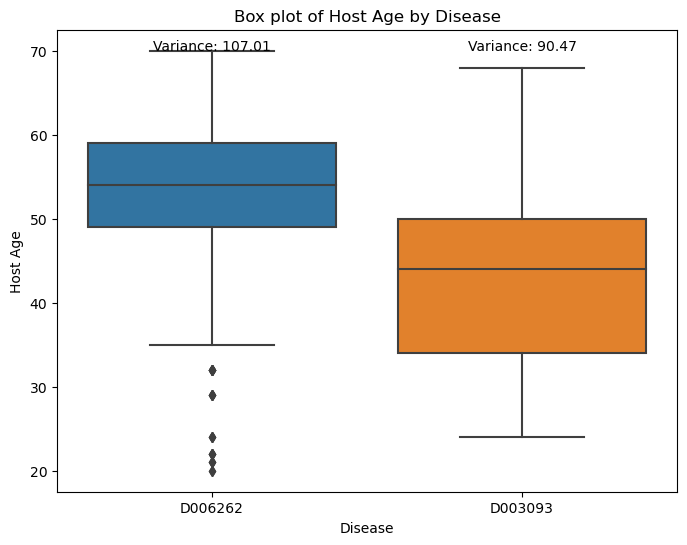

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='host_age', data=train_metadata)

# Calculate variance for each disease group
variance = train_metadata.groupby('disease')['host_age'].var()

# Add variance to the plot as text
for i, var in enumerate(variance):
    plt.text(i, train_metadata['host_age'].max(), f'Variance: {var:.2f}', 
             horizontalalignment='center', color='black')

# Label the plot
plt.title('Box plot of Host Age by Disease')
plt.xlabel('Disease')
plt.ylabel('Host Age')

# Show the plot
plt.show()

In [8]:
from scipy.stats import ttest_ind

# Split the data into two groups based on disease
age_disease_0 = train_metadata[train_metadata['disease'] == 'D006262']['host_age']
age_disease_1 = train_metadata[train_metadata['disease'] == 'D003093']['host_age']

# Perform the t-test
t_stat, p_value = ttest_ind(age_disease_0, age_disease_1)
print(f'T-Statistic: {t_stat}, p-value: {p_value}')

T-Statistic: 14.43064220780013, p-value: 1.702537097033588e-41


In [10]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(age_disease_0, age_disease_1)
print(f'U-Statistic: {u_stat}, p-value: {p_value}')

U-Statistic: 85953.5, p-value: 1.1789754841345392e-39


In [14]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information between features and host_age
mi = mutual_info_regression(train_relative_abundance, train_metadata['host_age'])

# Create a DataFrame of mutual information scores
mi_scores = pd.Series(mi, index=train_relative_abundance.columns).sort_values(ascending=False)

# Display top 10 features with the highest mutual information scores
print("Top 10 features with highest mutual information scores for host_age:")
print(mi_scores.head(50))

Top 10 features with highest mutual information scores for host_age:
39491     0.503669
487174    0.486288
397864    0.481153
820       0.462375
816       0.459785
292632    0.434578
39488     0.427173
28116     0.425199
39485     0.421501
40518     0.411364
46503     0.410630
246787    0.407644
360807    0.397984
1730      0.390269
166486    0.386785
841       0.385567
838       0.369113
1263      0.368629
33042     0.362699
88431     0.354898
375288    0.338578
410072    0.337485
821       0.336812
357276    0.336559
165179    0.335612
40520     0.331229
577309    0.330278
46506     0.312708
47678     0.310614
823       0.310361
189330    0.309674
39492     0.304940
818       0.302670
39496     0.296951
301301    0.292459
214856    0.277136
310298    0.275361
39486     0.272830
1301      0.270564
830       0.267482
204516    0.265578
1678      0.260550
207244    0.258483
28117     0.255009
39948     0.251047
45851     0.247815
28111     0.244861
29465     0.244786
562       0.243791


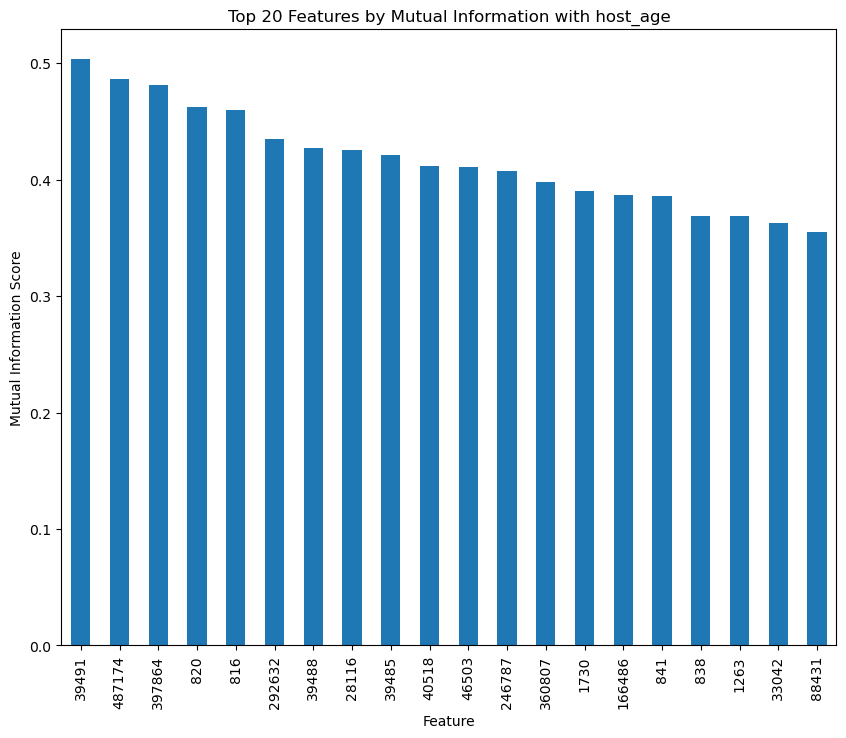

In [15]:
# Plot mutual information scores
plt.figure(figsize=(10, 8))
mi_scores.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Features by Mutual Information with host_age')
plt.xlabel('Feature')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()


In [3]:
metadata = pd.read_csv('UC_metadata_metagenomics_train.csv')

In [4]:
from scipy.stats import zscore

# Assuming 'host_age' is a column in your DataFrame
metadata['host_age_zscore'] = zscore(metadata['host_age'])

In [5]:
metadata.to_csv('UC_metadata_metagenomics_train.csv', index=False)